# Step 1: Import Necessary Libraries
Before we begin cleaning and analyzing the dataset, we need to import essential Python libraries:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data Set
The original dataset consists of athlete names along with medal results across different events, separated by gender (e.g., male_archery, female_athletics, etc.). However, there is a lot of sparsity in the dataset (most of the entries contain missing (NaN) values). Sparsity arises because each athlete competes in only 1 event, leaving most columns empty for any given individual. This structure makes analysis and visualization challenging, as the data is spread across multiple columns with very few actual values.

In [ ]:
olympics = pd.read_csv("data/olympics_08_medalists.csv")
olympics.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 # Step 2: Melt 
 To address the sparsity, the data must be converted from a wide format to a long format using the pd.melt() function. Instead of having separate columns for each event and gender, we transformed the data so each row represents an athlete, their gender, a specific event, and the medal they won. This restructuring reduces the number of empty cells, making it easier to analyze trends, count medals, and filter by event or gender. 

In [73]:

#Should I call this olympics_meleted
olympics_melted = pd.melt(olympics, id_vars=['medalist_name'],
                             value_vars=[col for col in olympics.columns if col != 'medalist_name'],
                             var_name='gender_event', value_name='Medal')
olympics_melted = olympics_melted.sort_values(by=['medalist_name'], ascending=True)
olympics_melted.head()

,medalist_name,gender_event,Medal
0,Aaron Armstrong,male_archery,NaN
71250,Aaron Armstrong,female_judo,NaN
123750,Aaron Armstrong,female_weightlifting,NaN
73125,Aaron Armstrong,male_modern pentathlon,NaN
30000,Aaron Armstrong,male_mountain biking,NaN


# Step 3: Clean Data Set
Even after restructuring the dataset, we still have many NaN values. This is because, initially, each row represented an athlete with multiple event columns, many of which they did not compete in. The data is refiend by separating the gender_event column into distinct gender and event columns.Additionally, we filter out rows where Medal is NaN, not because we are filtering out non-medalists (since everyone in the dataset won a medal), but to remove cases where an athlete simply did not compete in a particular event.

In [69]:
# Step 1:  Separate gender end event columns which where together after melting process
olympics_melted[['gender', 'event']] = olympics_melted['gender_event'].str.split('_', expand=True)
olympics_melted.drop(columns=['gender_event'])

# Step 2: Re-order columns and Drop NaN
olympics_tidy = olympics_melted[['medalist_name','gender','event','Medal']]
olympics_tidy = olympics_tidy.dropna(subset=['Medal'])

#Step 3: Orgnize alphabeticaly by Medalist name
olympics_tidy = olympics_tidy.sort_values(by=['medalist_name'], ascending=True)

#Step 4: Preview Data
olympics_tidy.head()

,medalist_name,gender,event,Medal
3750,Aaron Armstrong,male,athletics,gold
90001,Aaron Peirsol,male,swimming,gold
69377,Abdullo Tangriev,male,judo,silver
123753,Abeer Abdelrahman,female,weightlifting,bronze
84379,Abhinav,male,shooting sport,gold


# Step 4: Investigate the Data

In [78]:
olympics_tidy.describe()

,medalist_name,gender,event,Medal
count,1875,1875,1875,1875
unique,1875,2,38,3
top,Aaron Armstrong,male,athletics,bronze
freq,1,1032,166,668


In [77]:
#Number of Medalists
medalists = olympics_tidy['Medal'].shape[0]
print(f'There are {medalists} Medalist in the Data Set')

#Number of Events
Events = olympics_tidy['event'].nunique()
print(f'There where {Events} differnet sports in the 2008 Olympic Games')

#Medal Count
gold_count = (olympics_tidy['Medal'] == 'gold').sum()
silver_count = (olympics_tidy['Medal'] == 'silver').sum()
bronze_count = (olympics_tidy['Medal'] == 'bronze').sum()

print(f"Medal Breakdown: Gold: {gold_count}, Silver: {silver_count}, Bronze: {bronze_count}")

There are 1875 Medalist in the Data Set
There where 38 differnet sports in the 2008 Olympic Games
Medal Breakdown: Gold: 586, Silver: 621, Bronze: 668


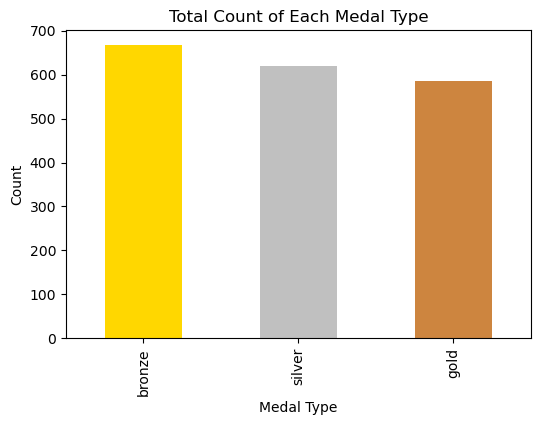

In [92]:
# Count the number of each medal type
medal_counts = olympics_tidy['Medal'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
medal_counts.plot(kind="bar", color=["gold", "silver", "peru"])

# Labels and title
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.title("Total Count of Each Medal Type")

# Show the plot
plt.show()

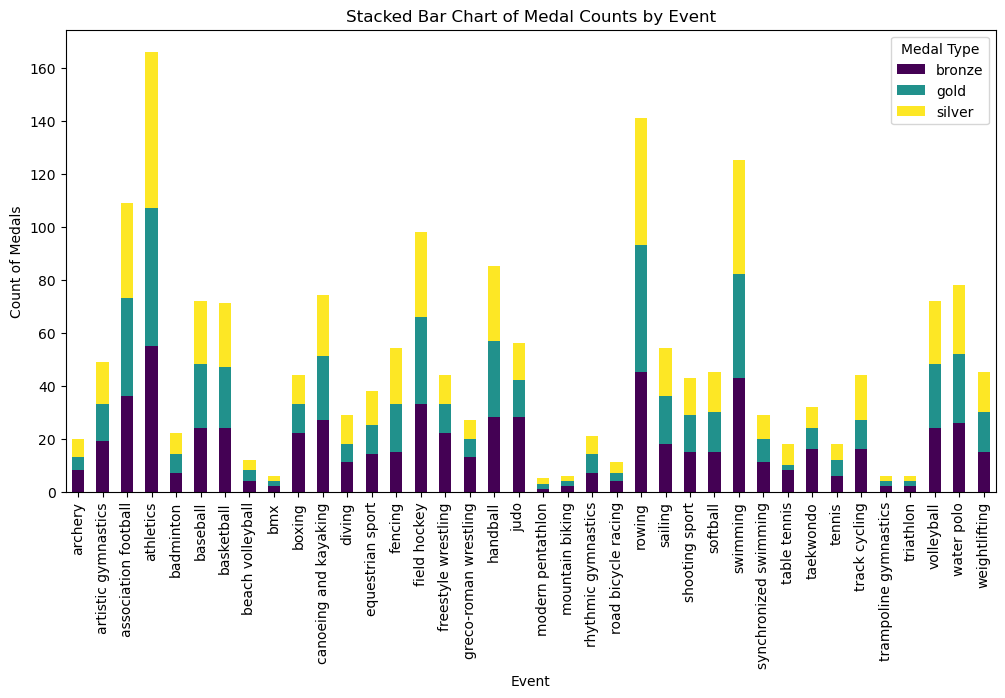

In [108]:
# Group by event and medal type, then count occurrences
event_medal_counts = olympics_tidy.groupby(['event', 'Medal']).size().unstack()

# Plot a stacked bar chart for the number of medals in each event
event_medal_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

# Labels and title
plt.xlabel("Event")
plt.ylabel("Count of Medals")
plt.title("Stacked Bar Chart of Medal Counts by Event")
plt.legend(title="Medal Type")

# Show the plot
plt.show()

In [106]:
rowing_filter = olympics_tidy['event'] == 'rowing'
rowing = olympics_tidy[rowing_filter]
rowing.describe()

,medalist_name,gender,event,Medal
count,141,141,141,141
unique,141,2,1,3
top,Acer Nethercott,male,rowing,silver
freq,1,83,141,48


In [91]:
olympics_tidy.groupby(['Medal','gender']).nunique()


medalist_name  event
Medal  gender                      
bronze female            294     34
       male              374     35
gold   female            271     35
       male              315     35
silver female            278     35
       male              343     35

<Axes: xlabel='Medal'>

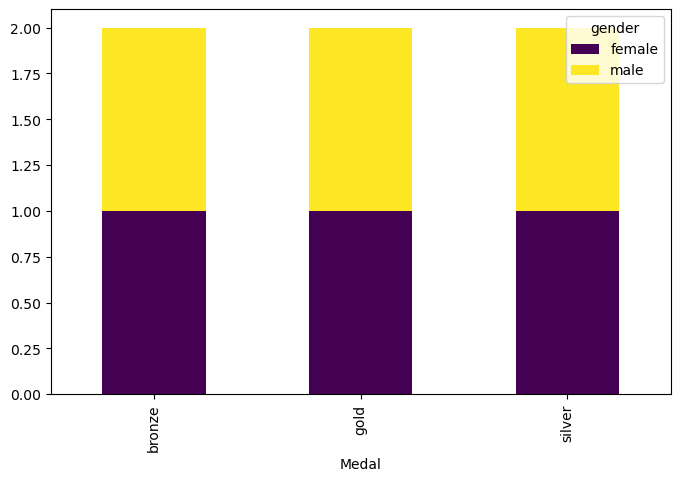

In [85]:
#Step 1: Group by Medal and Gender
medal_distribution = olympics_tidy.groupby(['Medal','gender']).nunique()
# Convert to a format suitable for plotting

medal_distribution = medal_distribution.groupby(['Medal', 'gender']).size().unstack()

# Plot a stacked bar chart
medal_distribution.plot(kind="bar", stacked=True, figsize=(8, 5), cmap="viridis")

